# Thinkful Data Science Bootcamp Unit One Capstone

#### Roy Shabaya

Citi Bike is a bicycle sharing system in New York City allowing riders to rent bikes for short periods since 2013.  Using a system of 706 stations and 10,000 bikes, riders are able to rent a bike for 30 or 45 minutes.  Riders may purchase either a one day or three day pass, a User Type which Citi Bike classifies as a Customer.  Riders may also purchase an annual pass, which Citi Bike classifies as a Subscriber.  Citi Bike believes the annual pass is the best value for frequent riders.  An annual pass not only provides a lower overall cost, but also comes with an extended rental period of 45 minutes, versus 30 minutes for Customers.  Seeing that value, over the last two years 88.8% of Citi Bike customers were Subscribers.  

<function matplotlib.pyplot.show>

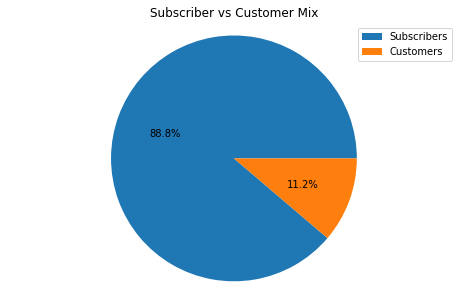

In [76]:
#Create User Type Mix Pie Chart
subscriber = ((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum()))
customer = 1 - subscriber
pie_data = [subscriber,customer]
fig, ax = plt.subplots(figsize=(8,5))
plt.pie(pie_data, autopct="%0.01f%%")
plt.title("Subscriber vs Customer Mix")
pie_legend = ["Subscribers","Customers"]
plt.legend(pie_legend)
plt.axis("equal")
plt.show

### The Problem

At several medium and high volume stations the percentage of riders that are a Subscriber are below 75%. For this analysis stations are classified as small if they have less than 2,500 trips per month, 2,500 - 4,000 trips will be classified as medium volume, and high volume will be greater than 4,000 trips. There is opportunity to target medium and high volume stations with Subscriber percentages below 75%, with strategies to convert Customers to Subscribers.  Subscribers are desirable to Citi Bike as the annual payment required represents guaranteed and steady revenue for Citi Bike.  Whereas Customers may use the service sporadically, as well as be tempted to use other services.  Therefore it is ideal for Citi Bike to increase the percentage of riders who are Subscribers.

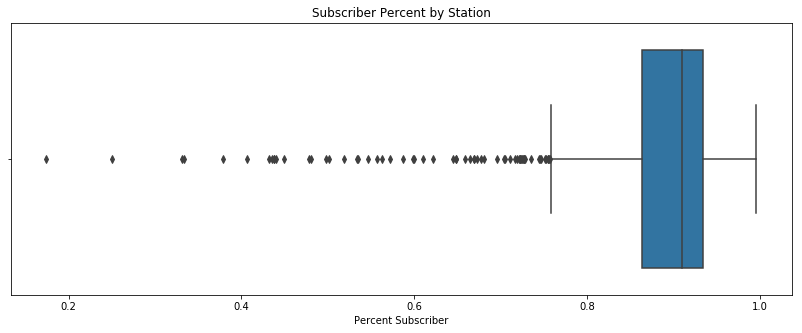

In [74]:
#Create Box Plot
box = user_pivot["Percent Subscriber"]
fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(box)
plt.title("Subscriber Percent by Station")
plt.show()

As shown by the box plot above most stations have a Subscriber percent above 80%, and the median near 90%.  However the outliers  at the lower end highlight there are quite a few stations where there is oppurtunity for improvement.  

#### The Data

<br>Data was obtained from Citi Bike NYC.  Data from October 2015 to September 2017 was used in this analysis.  Columns in the data source include start station name, start time, user type(Customer vs Subscriber), in addition to other fields.  29,095,751 rows of data were utilized for the analysis.

Data Source : https://www.citibikenyc.com/system-data

In [27]:
print("Sample of the data:")
file.head()

Sample of the data:


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,171,10/1/2015 00:00:02,10/1/2015 00:02:54,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,24302,Subscriber,1973.0,1,10/1/2015
1,593,10/1/2015 00:00:02,10/1/2015 00:09:55,518,E 39 St & 2 Ave,40.747804,-73.973442,438,St Marks Pl & 1 Ave,40.727791,-73.985649,19904,Subscriber,1990.0,1,10/1/2015
2,233,10/1/2015 00:00:11,10/1/2015 00:04:05,447,8 Ave & W 52 St,40.763707,-73.985162,447,8 Ave & W 52 St,40.763707,-73.985162,17797,Subscriber,1984.0,1,10/1/2015
3,250,10/1/2015 00:00:15,10/1/2015 00:04:25,336,Sullivan St & Washington Sq,40.730477,-73.999061,223,W 13 St & 7 Ave,40.737815,-73.999947,23966,Subscriber,1984.0,1,10/1/2015
4,528,10/1/2015 00:00:17,10/1/2015 00:09:05,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,16246,Customer,NaN,0,10/1/2015


### The Solution & Hypothesis
In order to help convert customers to subscribers sales persons will be staffed at select medium and high volume starting stations to discuss the different pass options with customers. The sales persons will be working to shift existing Customers to Subscribers. Therefore the hypothesis is that having a conversation with a salesperson about Citi Bike's offerings will increase the number of Subscribers, and improve the percentage of overall riders who are subscribers.

### The Method of Testing the Solution

In order to perform this test ten medium and high volume stations with a Subscriber percent below 75% will have sales people posted at the kiosk. Ten medium and high volume stations will also be selected as the control. The mix of medium and high volume stations in each group will be the same. Riders may return their bikes to their original station, or a different one. We will focus on interacting with those that are about to start their rides, and not those that are returning.  This will be to maintain the customer experience of dock your bike and go.  Only riders who are checking out a bike have to go to the kiosk.  

The sales person will be provided an outline of talking points to review with Customers their riding habits and determine if they would potentially benefit from becoming a Subscriber.  Due to seasonality where the riding volume decreases during the colder months of November to February, the primary riding season is April to October. 



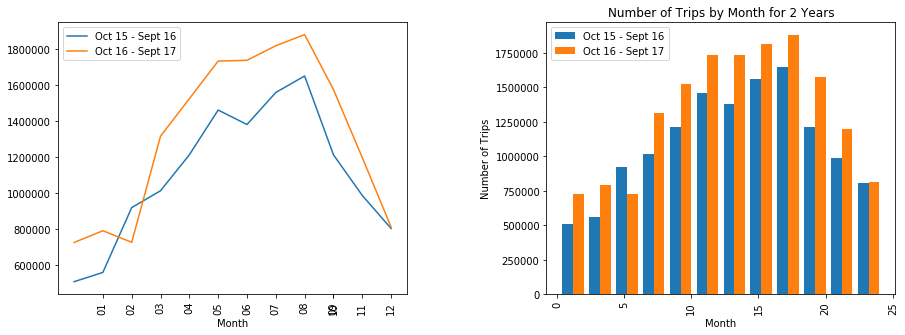

In [63]:
year_1 = final_date_data.loc[final_date_data["12_month"] == "Group 1"]
year_1 = year_1.sort_values("month")
year_2 = final_date_data.loc[final_date_data["12_month"] == "Group 2"]
year_2 = year_2.sort_values("month")
plt.figure(figsize=(15,5))
groups = ["Oct 15 - Sept 16", "Oct 16 - Sept 17"]
months_leg = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"]
datex=year_1.month
ax=plt.subplot()
ax.set_xticklabels(months_leg)
year_1_data =year_1.trip_count
year_2_data =year_2.trip_count
plt.subplot(1,2,1)

plt.plot(datex,year_1_data)
plt.plot(datex,year_2_data)
plt.xticks(["1","2","3","4","5","6","7","8","9","10","11","12"],rotation=90)

plt.legend(groups)
plt.xlabel("Month")
ax.set_xticklabels(months_leg)
plt.subplot(1,2,2)

n = 1

t = 2
d = 12
w = .8
year_1_x = [t*element + w*n for element in range(d)]

plt.bar(year_1_x, year_1_data)

n = 2
t = 2 
d = 12 
w = .8 
year_2_x = [t*element + w*n for element in range(d)]

plt.bar(year_2_x, year_2_data)


plt.xticks(rotation=90)

#not working to set xticks ax.set_xticklabels(months_leg)
plt.legend(groups)
plt.title("Number of Trips by Month for 2 Years")
plt.xlabel("Month")
plt.ylabel("Number of Trips")

plt.subplots_adjust(wspace = .4)
plt.show()


#### Rollout Plan

The test will be performed from the beginning of the riding season in April,  until the end of July, a period of four months. We will focus on this period as the best impression of value can be conveyed to the customers while they still have several months of the riding season left.  While October has had the peak number of riders the last two years, it will be difficult to sell an annual pass to a customer just before winter begins and ridership declines dramatically.

For each test station 3 sales associates will be hired, for a total of 30. One sales person will be required at a station at all times between 7 am to 8 pm, Monday to Friday.  During peak times there will be an overlap of two sales people. Sales people will be given the following instructions:

- Stand near the kiosk and engage customers as they check bikes out
- For those who are not Subscribers, ask about their riding habits, and if frequent suggest an annual pass highlighting how much they would save based on their riding habits.
- For those who ride frequently but object to the annual pass take notation on what their objection is:
    - Is it too expensive for a one time payment?
    - Do they feel they just don't need it?
    - Do they use other services as well?
    - Other - with general description

Sales people will be given a form to tally the responses they receive each day. This data will be aggregated and used for additional analysis after the test.


##### The Evaluation Plan

We will monitor the change in Subscriber percent between our two test groups, comparing at the end of the 4 month period.  If the Subscriber percent has increased 50% more for the test group than the control group, we can conclude that using sales people at stations will materially improve the Subscriber percent.  We will require such a high bar due to the labor costs, as opposed to just having a payment terminal. Some other metrics we will monitor include number of trips per station.  It will be interesting to see if having an employee there will impact overall usage of a station.  Increasing the number of overall riders, and not just converting existing Customers to Subscribers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
%matplotlib inline

In [34]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
#Bring in Data Files
a1=  pd.read_csv("201510-citibike-tripdata.csv")
a2=  pd.read_csv("201511-citibike-tripdata.csv")
a3=  pd.read_csv("201512-citibike-tripdata.csv")
a4=  pd.read_csv("201601-citibike-tripdata.csv")
a5=  pd.read_csv("201602-citibike-tripdata.csv")
a6=  pd.read_csv("201603-citibike-tripdata.csv")
a7=  pd.read_csv("201604-citibike-tripdata.csv")
a8=  pd.read_csv("201605-citibike-tripdata.csv")
a9=  pd.read_csv("201606-citibike-tripdata.csv")
a10= pd.read_csv("201607-citibike-tripdata.csv")
a11= pd.read_csv("201608-citibike-tripdata.csv")
a12= pd.read_csv("201609-citibike-tripdata.csv")
a13= pd.read_csv("201610-citibike-tripdata.csv")
a14= pd.read_csv("201611-citibike-tripdata.csv")
a15= pd.read_csv("201612-citibike-tripdata.csv")
a16= pd.read_csv("201701-citibike-tripdata.csv")
a17= pd.read_csv("201702-citibike-tripdata.csv")
a18= pd.read_csv("201703-citibike-tripdata.csv")
a19= pd.read_csv("201704-citibike-tripdata.csv")
a20= pd.read_csv("201705-citibike-tripdata.csv")
a21= pd.read_csv("201706-citibike-tripdata.csv")
a22= pd.read_csv("201707-citibike-tripdata.csv")
a23= pd.read_csv("201708-citibike-tripdata.csv")
a24= pd.read_csv("201709-citibike-tripdata.csv")




In [4]:
#Make all column headers the same -- There are slight formatting differences
a1t = a1.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a2t = a2.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a3t = a3.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a4t=  a4.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a5t=  a5.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a6t=  a6.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a7t=  a7.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a8t=  a8.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a9t=  a9.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a10t= a10.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a11t= a11.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a12t= a12.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a13t= a13.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a14t= a14.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a15t= a15.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a16t= a16.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a17t= a17.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a18t= a18.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a19t= a19.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a20t= a20.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a21t= a21.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a22t= a22.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a23t= a23.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})
a24t= a24.rename(columns={"Trip Duration":"tripduration","Start Time":"starttime","Stop Time":"stoptime","Start Station ID":"start station id","Start Station Name":"start station name","Start Station Latitude":"start station latitude","Start Station Longitude":"start station longitude","End Station ID":"end station id","End Station Name":"end station name","End Station Latitude":"end station latitude","End Station Longitude":"end station longitude","Bike ID":"bikeid","User Type":"usertype","Birth Year":"birth year","Gender":"gender"})


In [5]:
#Merge tables
raw_data = pd.concat([a1t,a2t,a3t,a4t,a5t,a6t,a7t,a8t,a9t,a10t,a11t,a12t,a13t,a14t,a15t,a16t,a17t,a18t,a19t,a20t,a21t,a22t,a23t,a24t])

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29095751 entries, 0 to 1878097
Data columns (total 15 columns):
tripduration               int64
starttime                  object
stoptime                   object
start station id           int64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             int64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 float64
gender                     int64
dtypes: float64(5), int64(5), object(5)
memory usage: 3.5+ GB


In [8]:
#raw_data.describe()

In [9]:
#Creating working copy
file = raw_data

In [10]:
#file.info()

In [11]:
#Add Date Column - Currently date with time
file["date"] = file["starttime"].apply(lambda x: x.split()[0])
#Group by date with count on trip duration
date_data = file.groupby("date").tripduration.count().reset_index()
date_data.rename(columns={"tripduration":"trip_count"},inplace=True)
#Rename
#date_data.head()

In [20]:
#date_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 2 columns):
date          723 non-null object
trip_count    723 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [12]:
#Convert date column to date formart
date_data["date"] = pd.to_datetime(date_data["date"])
#Extract month from date column and add new column month
date_data["month"] = date_data["date"].apply(lambda x: x.strftime("%m"))
#Extract year from date column and add new column month
date_data["year"] = date_data["date"].apply(lambda x: x.strftime("%Y"))
# ---- date_data["month_year"] = pd.to_datetime(date_data["month_year"])
final_date_data = date_data.groupby(["year","month"]).trip_count.sum().reset_index()

In [13]:
#date_data.info()

In [14]:
#Sort by Date
date_data = date_data.sort_values("date")

In [15]:
#Create new empty column
final_date_data["12_month"] = ""
#Create two 12 month groups for graphing
final_date_data.at[final_date_data.index[0:12], "12_month"] = "Group 1"
final_date_data.at[final_date_data.index[12:], "12_month"] = "Group 2"

In [16]:
year_1 = final_date_data.loc[final_date_data["12_month"] == "Group 1"]
year_1 = year_1.sort_values("month")
year_2 = final_date_data.loc[final_date_data["12_month"] == "Group 2"]
year_2 = year_2.sort_values("month")

datex=year_1.month
#ax=plt.subplot()
year_1_data =year_1.trip_count
year_2_data =year_2.trip_count
#plt.plot(datex,year_1_data)
#plt.plot(datex,year_2_data)
#plt.xticks(rotation=90)
#plt.figure(figsize=(10,10))
#groups = ["Oct 15 - Sept 16", "Oct 16 - Sept 17"]
#months_leg = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov", "Dec"]
#ax.set_xticklabels(months_leg)
#plt.legend(groups)
#plt.title("Number of Trips by Month for 2 Years")
#plt.xlabel("Month")
#plt.ylabel("Number of Trips")
#Legend and labels, month number to month
#plt.show()


In [17]:
#final_date_data.head(24)

In [18]:
#file.head()

In [19]:
#Groupby Start Station and User type
user_type_data = file.groupby(["start station name","usertype"]).tripduration.count().reset_index()
#Pivot user type to columns
user_pivot= user_type_data.pivot(columns = "usertype", index="start station name", values= "tripduration").reset_index()
# Add perecent subscriber column
user_pivot["Percent Subscriber"] = user_pivot["Subscriber"] / (user_pivot["Subscriber"]+ user_pivot["Customer"])
#Sort by Subscriber Percent
user_pivot = user_pivot.sort_values(by="Percent Subscriber",ascending=True).reset_index()
#See top 10 rows of final table
#user_pivot.head(10)



In [20]:
#Calculate Mean, Median, Max, Min, Total Mix
#print("Mean is:" +str(user_pivot["Percent Subscriber"].mean()))
#print("Median is:" +str(user_pivot["Percent Subscriber"].median()))
#print("Max is: " + str(user_pivot["Percent Subscriber"].max()))
#print("Min is: " + str(user_pivot["Percent Subscriber"].min()))
#print("Total Subscriber Percent: " + str((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum())))

In [23]:
#Separate by year to see how changing
subscriber = ((user_pivot.Subscriber.sum())/(user_pivot.Customer.sum() + user_pivot.Subscriber.sum()))
customer = 1 - subscriber
pie_data = [subscriber,customer]
#plt.pie(pie_data, autopct="%0.01f%%")
#plt.title("Subscriber vs Customer Mix")
#pie_legend = ["Subscribers","Customers"]
#plt.legend(pie_legend)
#plt.axis("equal")
#plt.show

In [22]:
#Create Box Plot
#box = user_pivot["Percent Subscriber"]
#sns.boxplot(box)
#plt.title("Starting Station Subscriber Percent Box Plot")
#plt.show()

